s='[1*]CCC.[2*]O.[3*]C.[4*]C.[5*]OO'
frags_as_mols=['[1*]CCC', '[2*]O', '[3*]C', '[4*]C', '[5*]OO']
  Atom 0 is C
  Atom 1 is C
  Atom 2 is C
  Atom 3 is C
  Atom 4 is C
  Atom 5 is O
  Atom 6 is N
  Atom 7 is C
  Atom 8 is C
  Atom 9 is C
  Atom 10 is C
  Atom 11 is C
  Atom 12 is O
  Atom 13 is O


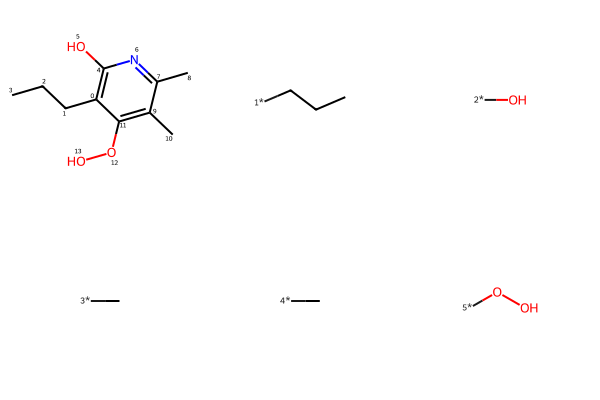

In [6]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import Draw

ms = [Chem.MolFromSmiles(s) for s in ('c1cnccc1','c(CCC)1c(O)nc(C)c(C)c(OO)1')]

core = ms[0]

res = Chem.ReplaceCore(ms[1],core)

s = Chem.MolToSmiles(res)

print(f"{s=}")

frags = Chem.GetMolFrags(res,asMols=True)

frags_as_mols = [Chem.MolToSmiles(x) for x in frags]
print(f"{frags_as_mols=}")

for atom in ms[1].GetAtoms():
    print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    # For each atom, set the property "atomNote" to index of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()))
Draw.MolsToGridImage([ms[1], *frags], useSVG=True)

In [7]:
rgd,_ = rdRGroupDecomposition.RGroupDecompose([core],ms,asSmiles=True)
rgd

[{'Core': 'n1c([*:3])c([*:2])c([*:1])c([*:5])c1[*:4]',
  'R1': '[H][*:1]',
  'R2': '[H][*:2]',
  'R3': '[H][*:3]',
  'R4': '[H][*:4]',
  'R5': '[H][*:5]'},
 {'Core': 'n1c([*:3])c([*:2])c([*:1])c([*:5])c1[*:4]',
  'R1': 'OO[*:1]',
  'R2': 'CCC[*:2]',
  'R3': 'O[*:3]',
  'R4': 'C[*:4]',
  'R5': 'C[*:5]'}]